Name :Ajinkya Sunil Patil

Roll No :42

Div : **D15B**

**DMBI Practical 02**

**Trip_Dataset**

**Aim:** To perform data preprocessing on the dataset using python.

# **Introduction:**

Data preprocessing is a crucial step in machine learning and data analysis that involves transforming raw data into a clean and structured format suitable for analysis. Raw datasets often contain missing values, noise, duplicates, or inconsistencies that can negatively impact the performance of machine learning models. Preprocessing helps enhance data quality and ensures better model accuracy and reliability.

**Key Steps in Data Preprocessing:**
* Handling Missing Data: Filling missing values using mean, median, mode, or predictive techniques.
* Removing Duplicates: Eliminating redundant records to maintain data integrity.
* Handling Outliers: Detecting and treating outliers using statistical methods.
* Encoding Categorical Data: Converting categorical values into numerical formats using label encoding or one-hot encoding.
* Feature Scaling: Standardizing or normalizing numerical features to bring them to a uniform scale.
* Feature Selection & Extraction: Reducing dimensionality by selecting important features for improved efficiency.

These preprocessing techniques ensure that the dataset is well-structured and suitable for further analysis, leading to better predictive performance in machine learning models.

In [ ]:
import pandas as pd

In [ ]:
# Load the dataset
file_path = "/content/unfiltered_travel_data.csv"  # Ensure correct path in Colab
df = pd.read_csv(file_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Traveler_ID         10000 non-null  int64  
 1   Destination         10000 non-null  object 
 2   Travel_Mode         10000 non-null  object 
 3   Days_of_Stay        10000 non-null  float64
 4   Travel_Cost         9505 non-null   float64
 5   Age                 9500 non-null   float64
 6   Rating              9500 non-null   float64
 7   Feedback            9018 non-null   object 
 8   Booking_Date        10000 non-null  object 
 9   Is_Repeat_Customer  10000 non-null  int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 781.4+ KB


In [ ]:
df.head()

,Traveler_ID,Destination,Travel_Mode,Days_of_Stay,Travel_Cost,Age,Rating,Feedback,Booking_Date,Is_Repeat_Customer
0,1,London,Train,2.0,NaN,62.0,1.969211,Excellent,2022-01-01 00:00:00,1
1,2,London,Car,8.0,134.0,40.0,3.422692,Good,2022-01-01 01:00:00,1
2,3,London,Car,6.0,2422.0,59.0,3.712241,Excellent,2022-01-01 02:00:00,0
3,4,Dubai,Flight,1.0,4805.0,44.0,1.453112,Good,2022-01-01 03:00:00,1
4,5,Paris,Flight,7.0,4869.0,27.0,4.358790,Poor,2022-01-01 04:00:00,0


# **1.Data Cleaning - removing missing values**

Missing values in a dataset can affect analysis and machine learning models. Here, we explore different methods to handle missing values in the Titanic dataset and determine the most suitable approach.

In [ ]:
# Display initial missing values
print("Missing Values Before Handling:")
print(df.isnull().sum())

Missing Values Before Handling:
Traveler_ID             0
Destination             0
Travel_Mode             0
Days_of_Stay            0
Travel_Cost           495
Age                   500
Rating                500
Feedback              982
Booking_Date            0
Is_Repeat_Customer      0
dtype: int64


**Approach 1. Dropping Missing Values**

Remove rows or columns with missing data.

When to Use: If a small percentage of data is missing.

In [ ]:
# Dropping rows with missing values
df_dropped = df.dropna()
print("\nAfter Dropping Missing Values:")
print(df_dropped.isnull().sum())
print(df_dropped.shape)


After Dropping Missing Values:
Traveler_ID           0
Destination           0
Travel_Mode           0
Days_of_Stay          0
Travel_Cost           0
Age                   0
Rating                0
Feedback              0
Booking_Date          0
Is_Repeat_Customer    0
dtype: int64
(7734, 10)


**Approach 2. Filling with the Mean Value**

Replace missing values with the mean (or median) of the column.

When to Use:

For numeric columns where the data distribution is relatively normal (e.g., Fare).
When missing values are few and filling with the mean preserves the overall data distribution.

In [ ]:
# Fill numerical columns with mean
numerical_cols = ["Travel_Cost", "Age", "Rating"]
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)

<ipython-input-8-db71b9606ec1>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


**Approach 3. Filling with a Default Value**

Replace missing values with a fixed value (e.g., 0, 'Unknown').

When to Use: When missing values represent a category or missing data is negligible (e.g., Cabin)

In [ ]:
# Fill categorical column with "Unknown"
df["Feedback"].fillna("Unknown", inplace=True)

<ipython-input-9-45c18d5e2e97>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Feedback"].fillna("Unknown", inplace=True)


In [ ]:
# Display the updated missing value count
print("Missing Values After Handling:")
print(df.isnull().sum())
print(df.shape)

Missing Values After Handling:
Traveler_ID           0
Destination           0
Travel_Mode           0
Days_of_Stay          0
Travel_Cost           0
Age                   0
Rating                0
Feedback              0
Booking_Date          0
Is_Repeat_Customer    0
dtype: int64
(10000, 10)


# **2.Data Cleaning - removing noisy values**
Noisy data refers to values that are erroneous or out of the expected range, often caused by data entry errors or unexpected behavior in the data collection process. In this section, we'll explore how noisy data can be identified and handled in the Titanic dataset.

**Identifying Noisy Data**

A. For Numeric Columns (Outliers)

Outliers in numeric columns can be detected using statistical methods like the Z-score or Interquartile Range (IQR). Outliers are values significantly higher or lower than the majority of the data.

Using IQR to Detect Outliers:

In [ ]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [ ]:
# Detect outliers for numerical columns
outliers_travel_cost, lc_travel_cost, uc_travel_cost = detect_outliers_iqr(df, "Travel_Cost")
outliers_age, lc_age, uc_age = detect_outliers_iqr(df, "Age")
outliers_rating, lc_rating, uc_rating = detect_outliers_iqr(df, "Rating")

In [ ]:
# Count of outliers in each column
outlier_counts = {
    "Travel_Cost": len(outliers_travel_cost),
    "Age": len(outliers_age),
    "Rating": len(outliers_rating)
}

outlier_counts

{'Travel_Cost': 0, 'Age': 0, 'Rating': 0}

# **3.Data Transformation - Converting Numerical to Categorical and Vice Versa**
Data transformation is the process of converting attributes (columns) in a dataset from one format or type to another to facilitate analysis or model training. One common transformation is converting numerical attributes to categorical or vice versa, and one-hot encoding categorical features for machine learning models.

**Converting Numerical Attributes to Categorical**

Sometimes, numerical attributes may be better represented as categorical data for analysis or modeling. For example, age groups can be created from continuous age values, or fare prices can be divided into fare ranges.

Approach for Converting Numerical Data to Categorical: We can use binning to convert continuous numerical values into discrete categories.

In [ ]:
bins = [0, 5, 10, 15]
labels = ['Short', 'Medium', 'Long']
df['Stay_Duration'] = pd.cut(df['Days_of_Stay'], bins=bins, labels=labels)

In [ ]:
print(df.head())

   Traveler_ID Destination Travel_Mode  Days_of_Stay  Travel_Cost   Age  \
0            1      London       Train           2.0  2530.238296  62.0   
1            2      London         Car           8.0   134.000000  40.0   
2            3      London         Car           6.0  2422.000000  59.0   
3            4       Dubai      Flight           1.0  4805.000000  44.0   
4            5       Paris      Flight           7.0  4869.000000  27.0   

     Rating   Feedback         Booking_Date  Is_Repeat_Customer Stay_Duration  
0  1.969211  Excellent  2022-01-01 00:00:00                   1         Short  
1  3.422692       Good  2022-01-01 01:00:00                   1        Medium  
2  3.712241  Excellent  2022-01-01 02:00:00                   0        Medium  
3  1.453112       Good  2022-01-01 03:00:00                   1         Short  
4  4.358790       Poor  2022-01-01 04:00:00                   0        Medium  


**Converting Categorical Attributes to Numerical**

For machine learning models, it's common to convert categorical data into numerical form because models can't interpret non-numeric data.

Approach for Converting Categorical Data to Numerical:

**One-Hot Encoding: Create binary columns for each category.**

In [ ]:
#Categorical to Numerical One-Hot Encoding for nominal categories
df = pd.get_dummies(df, columns=['Destination', 'Travel_Mode'], drop_first=True)
print(df.head())

   Traveler_ID  Days_of_Stay  Travel_Cost   Age    Rating   Feedback  \
0            1           2.0  2530.238296  62.0  1.969211  Excellent   
1            2           8.0   134.000000  40.0  3.422692       Good   
2            3           6.0  2422.000000  59.0  3.712241  Excellent   
3            4           1.0  4805.000000  44.0  1.453112       Good   
4            5           7.0  4869.000000  27.0  4.358790       Poor   

          Booking_Date  Is_Repeat_Customer Stay_Duration  Destination_London  \
0  2022-01-01 00:00:00                   1         Short                True   
1  2022-01-01 01:00:00                   1        Medium                True   
2  2022-01-01 02:00:00                   0        Medium                True   
3  2022-01-01 03:00:00                   1         Short               False   
4  2022-01-01 04:00:00                   0        Medium               False   

   Destination_New York  Destination_Paris  Destination_Tokyo  \
0                 Fal


**Label Encoding: Assign each category a unique number.**

In [ ]:
#Categorical to Numerical Label Encoding for ordinal categories
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Feedback'] = le.fit_transform(df['Feedback'])


# **4.Data Transformation - Data Normalization**
Normalization refers to the process of scaling numeric data to fall within a specific range, typically [0, 1], to improve the performance and training stability of machine learning algorithms. It is especially important when features have different units or scales.

Min-Max Normalization (Scaling)

Min-Max normalization rescales the data to a specific range, usually [0, 1]. The formula is: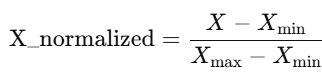
are the minimum and maximum values of the feature.

Use Case:

1.When we want to preserve the relationships in the data, but scale it to a fixed range

2.Commonly used in neural networks, which require input features to be on the same scale.



In [ ]:
#Standardize or Normalize Numerical Data: Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Travel_Cost', 'Age', 'Rating']] = scaler.fit_transform(df[['Travel_Cost', 'Age', 'Rating']])
print(df.head())

   Traveler_ID  Days_of_Stay  Travel_Cost       Age    Rating  Feedback  \
0            1           2.0     0.515834  0.785714  0.242336         1   
1            2           8.0     0.045891  0.392857  0.605798         2   
2            3           6.0     0.494607  0.732143  0.678204         1   
3            4           1.0     0.961953  0.464286  0.113279         2   
4            5           7.0     0.974505  0.160714  0.839882         3   

          Booking_Date  Is_Repeat_Customer Stay_Duration  Destination_London  \
0  2022-01-01 00:00:00                   1         Short                True   
1  2022-01-01 01:00:00                   1        Medium                True   
2  2022-01-01 02:00:00                   0        Medium                True   
3  2022-01-01 03:00:00                   1         Short               False   
4  2022-01-01 04:00:00                   0        Medium               False   

   Destination_New York  Destination_Paris  Destination_Tokyo  \
0  

**Z-Score Normalization (Standardization)**

Z-score normalization, also known as standardization, transforms the data to have a mean of 0 and a standard deviation of 1. The formula is:

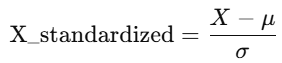


σ is the standard deviation of the feature.

Use Case:
* When data has varying scales and we want to standardize them without any bounding.
* Common in algorithms that assume data is normally distributed, such as linear regression, logistic regression, and SVMs.

In [ ]:
#Z-Score Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Travel_Cost', 'Age', 'Rating']] = scaler.fit_transform(df[['Travel_Cost', 'Age', 'Rating']])
print(df.head())

   Traveler_ID  Days_of_Stay  Travel_Cost       Age    Rating  Feedback  \
0            1           2.0     0.000000  1.002233 -0.926088         1   
1            2           8.0    -1.732611 -0.374198  0.367697         2   
2            3           6.0    -0.078262  0.814538  0.625433         1   
3            4           1.0     1.644777 -0.123938 -1.385483         2   
4            5           7.0     1.691052 -1.187544  1.200945         3   

          Booking_Date  Is_Repeat_Customer Stay_Duration  Destination_London  \
0  2022-01-01 00:00:00                   1         Short                True   
1  2022-01-01 01:00:00                   1        Medium                True   
2  2022-01-01 02:00:00                   0        Medium                True   
3  2022-01-01 03:00:00                   1         Short               False   
4  2022-01-01 04:00:00                   0        Medium               False   

   Destination_New York  Destination_Paris  Destination_Tokyo  \
0  

# **5.Data Reduction Attribute-Oriented Induction**
Data reduction is the process of reducing the volume of data while maintaining its essential properties. This helps to decrease storage requirements and improve the efficiency of analysis or modeling.

One common method of data reduction is

Attribute-Oriented Induction (AOI) or
Numerosity Reduction,
which reduces the number of attributes (columns) in the dataset while retaining the necessary information.

**A. Attribute-Oriented Induction (AOI)**

Attribute-Oriented Induction (AOI) is a generalization technique where values of attributes are replaced with higher-level concepts or categories. It works by aggregating and simplifying the data to reduce its complexity while preserving important information.

Approach for AOI:

* Identify categorical attributes with multiple unique values.
* Replace those values with higher-level categories or ranges.
* For numerical data, you can replace continuous values with a range or bin them.
* This is especially useful in cases where certain values or combinations are not significant enough for analysis or modeling.

In [ ]:
# Group by 'Is_Repeat_Customer' and aggregate mean for numerical columns
aggregated_data = df.groupby('Is_Repeat_Customer')[['Days_of_Stay', 'Travel_Cost', 'Age', 'Rating']].mean()

# Display aggregated data
print(aggregated_data)

                    Days_of_Stay  Travel_Cost       Age    Rating
Is_Repeat_Customer                                               
0                      17.337641     0.005542 -0.003667 -0.003720
1                      17.617916    -0.008173  0.005408  0.005485


In [ ]:
# Group by 'Stay_Duration' and calculate mean
aggregated_data_by_duration = df.groupby('Stay_Duration')[['Days_of_Stay', 'Travel_Cost', 'Age', 'Rating']].mean()

# Display aggregated data
print(aggregated_data_by_duration)

               Days_of_Stay  Travel_Cost       Age    Rating
Stay_Duration                                               
Short              3.017857    -0.007889  0.021673  0.010283
Medium             8.002300    -0.004111 -0.036265 -0.019636
Long              12.484451     0.015518  0.022724  0.009950


<ipython-input-21-c8a73ca43fcc>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data_by_duration = df.groupby('Stay_Duration')[['Days_of_Stay', 'Travel_Cost', 'Age', 'Rating']].mean()


**B. Numerosity Reduction**

Numerosity reduction involves reducing the number of data points by replacing a large set of data values with smaller, more representative values. It can be achieved by:

* Clustering: Grouping similar data points together and representing each cluster with a representative value (e.g., centroid).
* Sampling: Selecting a smaller, representative subset of the data points.
* Aggregation: Summarizing data by combining multiple values into a single representative value.

In [ ]:
#Numerosity Reduction Remove Duplicate Rows
# Remove duplicate rows
df = df.drop_duplicates()

# Display the shape of the dataset after removing duplicates
print("Shape after removing duplicates:", df.shape)

Shape after removing duplicates: (10000, 16)


C. Numerosity Reduction through Sampling

Sampling involves selecting a smaller subset of the data to represent the entire dataset. This is useful when dealing with large datasets where it's computationally expensive to process all data points.

Here’s how we can randomly sample 50% of the data:

In [ ]:
#Randomly sample the dataset
# Sample 50% of the dataset
df_sampled = df.sample(frac=0.5, random_state=42)  # Random state ensures reproducibility

# Display the shape of the sampled dataset
print("Shape of sampled dataset:", df_sampled.shape)

# Display the first few rows of the sampled dataset
print(df_sampled.head())

Shape of sampled dataset: (5000, 16)
      Traveler_ID  Days_of_Stay  Travel_Cost       Age    Rating  Feedback  \
6252         6253           6.0     1.249266 -1.625499 -0.541739         1   
4684         4685          10.0     1.471967 -0.249068  0.954199         1   
1731         1732          14.0     0.000000  1.189928 -0.107670         4   
4742         4743          14.0    -0.010295 -1.375239 -0.064153         1   
4521         4522          11.0    -1.026187  0.626843 -1.451475         2   

             Booking_Date  Is_Repeat_Customer Stay_Duration  \
6252  2022-09-18 12:00:00                   0        Medium   
4684  2022-07-15 04:00:00                   0        Medium   
1731  2022-03-14 03:00:00                   0          Long   
4742  2022-07-17 14:00:00                   0          Long   
4521  2022-07-08 09:00:00                   0          Long   

      Destination_London  Destination_New York  Destination_Paris  \
6252               False                  True

In [ ]:
#Save the Processed Dataset
processed_file_path = '/content/processed_travel_data.csv'
df.to_csv(processed_file_path, index=False)
print(f"Processed dataset saved at {processed_file_path}")

Processed dataset saved at /content/processed_travel_data.csv


In [ ]:
#Download the Processed Dataset
from google.colab import files
files.download(processed_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df = pd.read_csv('/content/processed_travel_data.csv')

#**Conclusion:**

Data preprocessing helps clean and organize raw data, making it suitable for analysis and machine learning. By handling missing values, duplicates, and scaling features, we improve the accuracy and reliability of our models.